# Solución de Tarea 2

Primero se incluyen los paquetes necesarios, *csv*, *numpy* y *matplotlib* 

In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt

Luego se crean un par de matrices para nuestros datos de $SOC$ y $OCV$

In [8]:
soc = np.array([])
ocv = np.array([])

Ahora:
* se abre el archivo *OCV(z).csv* en modo de solo lectura *r*
* se imprime la primera fila, que tiene los títulos
* se ingresa en el loop dejando afuera la primera fila y se van anexando los datos en las matrices

In [9]:
with open("OCV(z).csv", mode="r")as file:
    read = csv.reader(file)
    print("Los títulos de las columnas son:")
    print(next(read))
    for row in read:
        soc = np.append(soc,float(row[0]))
        ocv = np.append(ocv,float(row[1]))

Los títulos de las columnas son:
['SOC', 'OCV']


Luego se grafican los datos usando matlibplot

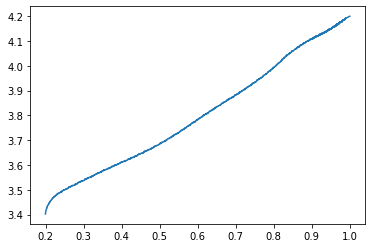

In [10]:
plt.plot(soc,ocv)
plt.show()

Ahora se define la función que se usa para interpolar

In [52]:
def ocv_value(soc_values, ocv_values, input_soc):
    "devuelve el valor del OCV para cualquier SOC"
    output_ocv = 0
    for i in range(len(soc_values)):
        if input_soc <= soc_values[i]:
            if soc_values[i-1] == soc_values[i]:
                output_ocv = ocv_values[i]
                break
            output_ocv = ocv_values[i-1] + (ocv_values[i]-ocv_values[i-1])*((input_soc - soc_values[i-1])/(soc_values[i] - soc_values[i-1]))
            break
    return output_ocv

In [62]:
ocv_int = np.array([])
soc_int = np.linspace(0.2, 1, num=10)
for i in range(len(soc_int)):
    ocv_int = np.append(ocv_int,ocv_value(soc,ocv,soc_int[i]))

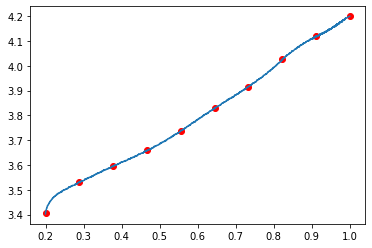

In [63]:
plt.plot(soc_int,ocv_int,'or',soc,ocv)
plt.show()